# Landing

This section computes parameters related to HL devices for the example aiplane in landing conditions. The drag polar in landing condition is also plotted, and the maximum $L/D$ is also determined. Based on constraint analysis, the $C_{L_{max_{L}}}$ is 2.2 for the example airplane. Note that $C_{L_{max}}$ is 1.44 which is computed in aerodynamics section. Using these values and the process outlined earlier, below code block computes various parameters related to HL devices for landing conditions.

In [72]:
# Variables
CLmax = 1.44
CLmaxL = 2.2
Sf = 58.1 # sq ft
Sref = 134 # sq ft
K = 0.93 # from figure 7.4, Roskam Part 2
cf_c = 0.25
delta_alpha_Clzero = -18 # deg, assumed from Raymer
Clalpha = 0.116 # 1/deg for NACA 23018
alpha_CLzero = -1 # from aerodynamics section

# Requried change in Cl
delta_CLmax = 1.05*(CLmaxL - CLmax)
delta_Clmax = delta_CLmax * Sref / Sf
delta_Cl = delta_Clmax / K

print(f"Required change in airfoil sectional Cl: {delta_Cl:.2f}")

# Computed change in Cl
# Change the value of delta_f and alpha_delta_f until computed value is same as required
delta_f = 46 # deg
alpha_delta_f = 0.37 # fromdelta_f value and figure 7.8, Roskam Part 2
delta_Cl_comp = Clalpha * alpha_delta_f * delta_f

print(f"Computed change in airfoil sectional Cl with flap deflection of {delta_f} deg: {delta_Cl_comp:.2f}")

# change zero lift angle
delta_alpha_CLzero = delta_alpha_Clzero * Sf / Sref

# zero lift angle with landing flaps
alpha_flap_CLzero = alpha_CLzero + delta_alpha_CLzero

print(f"Zero-lift angle of attack with landing flaps: {alpha_flap_CLzero:.1f}  deg")

Required change in airfoil sectional Cl: 1.98
Computed change in airfoil sectional Cl with flap deflection of 46 deg: 1.97
Zero-lift angle of attack with landing flaps: -8.8  deg


Based on above calculation, it is determined that flap deflection of 45 degrees is enough to achieve the maximum $C_L$ of 2.2 in landing conditions. Below code block plots the corresponding lift curve:

> __*NOTE*:__ The sinlge slotted flap used for example airplane does not change the lift curve slope, while having approximating same $\alpha$ for maixmum $C_L$.

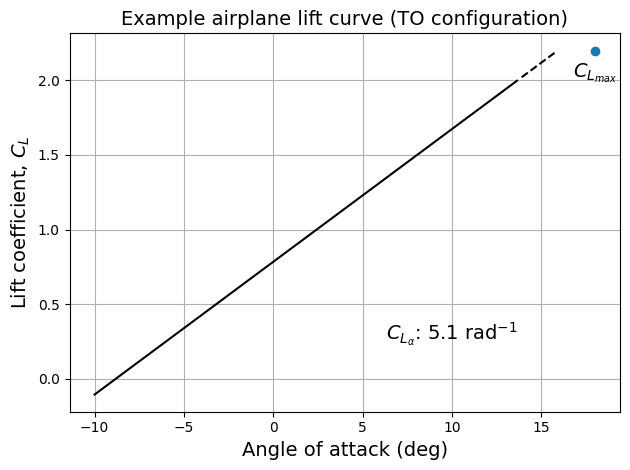

In [ ]:
# Lift curve
import numpy as np
import matplotlib.pyplot as plt

fs = 14 # fontsize
alpha = np.linspace(-10,16,100) * np.pi/180 # alpha values, rad
CLalpha = 5.1
CLmaxL = 2.2

CL = CLalpha * (alpha - alpha_flap_CLzero * np.pi/180)

# Splitting data based on linear and nonlinear region
CL_linear = CL[CL<=2.0]
alpha_linear = alpha[CL<=2.0]

CL_nonlinear = CL[np.logical_and(CL>2.0,CL<CLmaxL)]
alpha_nonlinear = alpha[np.logical_and(CL>2.0,CL<CLmaxL)]

fig, ax = plt.subplots()
ax.plot(alpha_linear*180/np.pi, CL_linear, "k-")
ax.plot(alpha_nonlinear*180/np.pi, CL_nonlinear, "k--")
ax.scatter(18, CLmaxL)
ax.set_xlabel("Angle of attack (deg)", fontsize=fs)
ax.set_ylabel("Lift coefficient, $C_L$", fontsize=fs)
ax.set_title("Example airplane lift curve (Landing configuration)", fontsize=fs)
ax.annotate(r"$C_{L_\alpha}$: " + f"{CLalpha:.2} " + r"$\text{rad}^{-1}$", (10,0.3), fontsize=fs, ha="center", va="center")
ax.annotate("$C_{L_{max}}$", (18,CLmaxL-0.15), fontsize=fs, ha="center", va="center")
ax.grid()
plt.tight_layout()


## Landing Drag Polar

Once lift curve is obtained for the landing flap settings, one can plot the drag polar as well. As discussed in aerodynamics section, a simple drag polar model is used. With flaps deployed, one has to compute its effect on $C_{D_0}$ and $C_{L_i}$. As described in [high-lift devices](intro.md) section, the change in $C_{D_0}$ can be computed based on amount of flap deflection. Further more, the $C_{D_0}$ will also be affected due to the landing gear (LG). If the exact dimensions of the LG components are known, then table 12.6 in Raymer can be used for estimating the contribution of LG towards $C_{D_0}$. Else, a rough estimate can be obtained from Table 3.6 in Roskam Part 1. Since LG is not fully sized at this stage of design, increase in $C_{D_0}$ due to LG is set to 0.02. To account for the change in induced drag, the value of $e$ is reduced by 0.1 (based on Table 3.6, Roskam Part 1). Below code block computes the change zero-lift drag:

In [56]:
Ff = 0.0074
cf_c = 0.25
Sf = 58.1 # sq ft
Sref = 134 # sq ft
delta_f = 45 # deg

delta_CD0 = Ff * cf_c * Sf / Sref * (delta_f - 10) + 0.02

print(f"Change in zero-lift drag: {delta_CD0:2f}")

Change in zero-lift drag: 0.048074


Below code block plots the drag polar for example airplane in landing conditions:

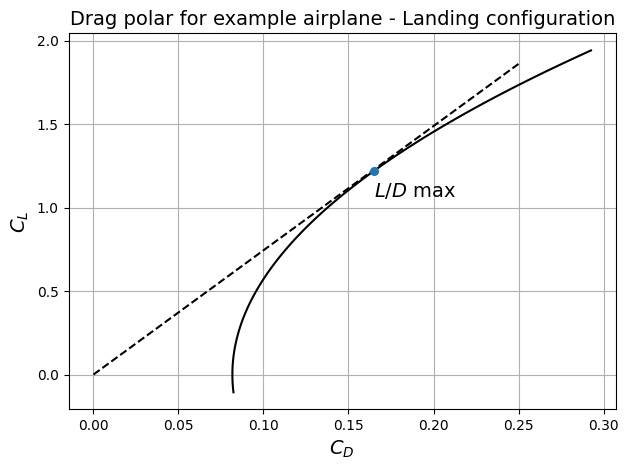

In [71]:
fs = 14 # fontsize
A = 8 # aspect ratio
CLalpha = 5.1 # 1/rad
e = 1.78*(1 - 0.045*A**0.68)-0.64 - 0.1 # e in landing

alpha = np.linspace(-10, 13, 100) # alpha in deg

CL = CLalpha * (alpha - alpha_flap_CLzero) * np.pi / 180

CD0 = 0.03363 + delta_CD0 # zero-lift drag in landing conditions

CD = CD0 + CL**2/np.pi/A/e # drag model

fig, ax = plt.subplots()
ax.plot(CD, CL, "k-")
ax.plot([0.0, 0.25], [0.0, 1.86], "k--")
ax.scatter(0.165, 1.22, zorder=10, s=30)
ax.set_xlabel("$C_D$", fontsize=fs)
ax.set_ylabel("$C_L$", fontsize=fs)
ax.set_title("Drag polar for example airplane - Landing configuration", fontsize=fs)
ax.annotate("$L/D$ max", (0.165,1.1), fontsize=fs, ha="left", va="center")
ax.grid()
plt.tight_layout()

As indicated in the above plot, the point where line from origin is tangent to drag polar refers to maximum $L/D$ in landing configuration. The example airplane has a maximum $L/D$ of 7.4. This concludes the HL devices sizing in landing condition.